# PYTHON DECISION TREE DEMO

### REGRESSION TREE

#### TRAINING DATASET

In [ ]:
# Create Regression Task
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, bias=100, noise=10, random_state=123)

# Reshape Training Data
X_train, y_train = X.reshape(-1,1), y.reshape(-1,1)

# Plot Training Data
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Regression Task')
plt.scatter(X_train, y_train, color='#000000', marker='o', s=25, alpha=0.25, label='Training Data')
plt.legend(loc='lower right')
plt.xlabel('x', fontsize=14, weight='bold')
plt.ylabel('y    ', fontsize=14, weight='bold', rotation='horizontal')
plt.xlim(-3,3)
plt.ylim(0,200)
plt.show()

#### FIT REGRESSION TREE MODEL

In [ ]:
list_max_depth = [None, 3, 1]

for value in list_max_depth:
    
    # Fit Regression Tree Model
    from sklearn.tree import DecisionTreeRegressor
    
    model = DecisionTreeRegressor(max_depth=value)
    model.fit(X_train, y_train)

    import numpy as np
    from sklearn.metrics import mean_absolute_error
    
    print('Model with max_depth=' + str(value)) 
    print('Tree Depth:', model.get_depth()) 
    print('No. of Leaves:', model.get_n_leaves())
    print('Training Set Error:', np.round(mean_absolute_error(y_train, model.predict(X_train)),3))

    # Use Fitted Model to Make Predictions on the whole Feature Space from -3 to +3
    X_space = np.linspace(-3,3,3000).reshape(-1,1)
    y_pred  = model.predict(X_space).reshape(-1,1)
    
    # Plot Training Data and Fitted Model
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    plt.rcParams.update(plt.rcParamsDefault)
    plt.figure(figsize=(6,4))
    plt.title('Fitted Tree Model (max_depth=' + str(value) + ')')
    plt.scatter(X_train, y_train, color='#000000', marker='o', s=25, alpha=0.25, label='Training Data')
    plt.plot(X_space, y_pred, color='#FC393E', linestyle='-', linewidth=2, label='Learned f(X)')
    plt.legend(loc='lower right')
    plt.xlabel("x", fontsize=14, weight='bold')
    plt.ylabel("y    ", fontsize=14, weight='bold', rotation='horizontal')
    plt.xlim(-3,3)
    plt.ylim(0,200)
    plt.show()

### CLASSIFICATION TREE

#### TRAINING DATASET

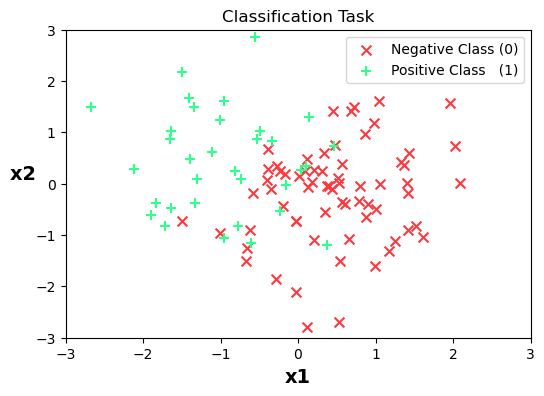

In [12]:
# Create Binary Classification Task
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100, n_features = 2, centers = 3, cluster_std = 5.0, random_state = 123)
y = y % 2

# Standardize Features X 
from sklearn.preprocessing import StandardScaler

X_train, y_train = StandardScaler().fit_transform(X), y

# Separate Samples
X_0 = X_train[y_train==0] # y=0 -> Red   -> Negative Class
X_1 = X_train[y_train==1] # y=1 -> Green -> Positive Class

# Plot Training Data
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Classification Task')
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='upper right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### FIT CLASSIFICATION TREE MODEL

Model with min_samples_split=2
Tree Depth: 9
No. of Leaves: 21
Training Set Accuracy: 100.0%


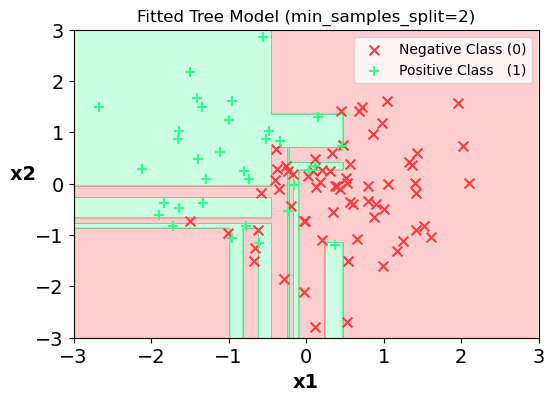

Model with min_samples_split=25
Tree Depth: 4
No. of Leaves: 7
Training Set Accuracy: 90.0%


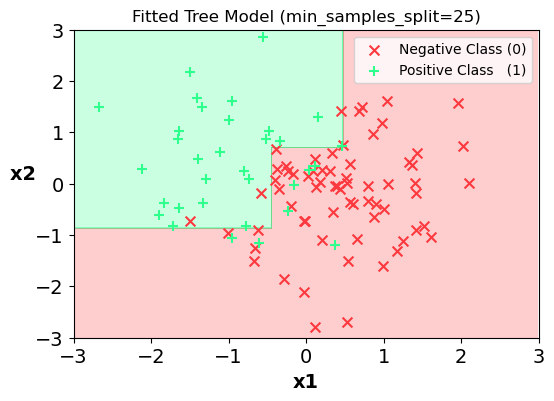

Model with min_samples_split=75
Tree Depth: 1
No. of Leaves: 2
Training Set Accuracy: 86.0%


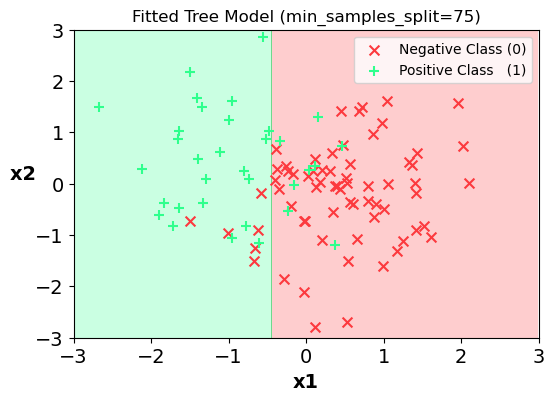

In [13]:
list_min_samples_split = [2, 25, 75]

for value in list_min_samples_split:

    # Fit Classificatio Tree Model
    from sklearn.tree import DecisionTreeClassifier
    
    model = DecisionTreeClassifier(max_depth=None, min_samples_split=value)
    model.fit(X_train, y_train)
    
    from sklearn.metrics import accuracy_score
    
    print('Model with min_samples_split=' + str(value)) 
    print('Tree Depth:', model.get_depth()) 
    print('No. of Leaves:', model.get_n_leaves())
    print('Training Set Accuracy:', str(accuracy_score(y_train, model.predict(X_train))*100) + '%')

    # Create Meshgrid of x1, x2 Values
    import numpy as np
    
    x1 = np.arange(-3, 3, 0.01)
    x2 = np.arange(-3, 3, 0.01)
    xx1, xx2 = np.meshgrid(x1, x2)

    # Evaluate f(X) on Grid
    Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

    # Plot Decision Boundary
    %matplotlib inline

    import matplotlib.pyplot as plt
    import matplotlib.colors
    cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

    plt.rcParams.update(plt.rcParamsDefault)
    plt.figure(figsize=(6,4))
    plt.title('Fitted Tree Model (min_samples_split=' + str(value) + ')')
    plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
    plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
    plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
    plt.legend(loc='upper right')
    plt.xlabel("x1",   fontsize=14, weight='bold')
    plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.show()